In [4]:
import csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [5]:
filename = "data/simd_file2.csv"


In [6]:
df = pd.read_csv(filename)
df

,operation,type,mode,size,time
0,ADD,scalar,sgx,0.2,0.0976
1,ADD,unroll,sgx,0.2,0.0920
2,ADD,simd_sse,sgx,0.2,0.0942
3,SIMD_load_store,simd_avx,sgx,0.2,0.0430
4,ADD,simd_avx,sgx,0.2,0.0394
...,...,...,...,...,...
99,AND,simd_avx,native,100.0,15.6000
100,SHIFT_RIGHT,scalar,native,100.0,41.3000
101,SHIFT_RIGHT,unroll,native,100.0,25.0000
102,SHIFT_RIGHT,simd_sse,native,100.0,25.6000


In [7]:
df_native = df.loc[df['mode'] == 'native']
df_sgx = df.loc[df['mode'] == 'sgx']

In [8]:
df_native_add = df_native.loc[df['operation'] == 'ADD']
df_sgx_add = df_sgx.loc[df['operation'] == 'ADD']
df_native_add

,operation,type,mode,size,time
52,ADD,scalar,native,0.2,0.0999
53,ADD,unroll,native,0.2,0.0462
54,ADD,simd_sse,native,0.2,0.0526
56,ADD,simd_avx,native,0.2,0.0284
65,ADD,scalar,native,6.4,2.5400
66,ADD,unroll,native,6.4,1.4900
67,ADD,simd_sse,native,6.4,1.6400
69,ADD,simd_avx,native,6.4,0.9090
78,ADD,scalar,native,16.0,6.4400
79,ADD,unroll,native,16.0,3.8300


In [9]:
y_native = {}
for op in df_native['operation'].unique():
    y_native[op] = ( df_native.loc[df_native['operation'] == op]["time"].reset_index(drop=True).to_list() )
y_native = pd.DataFrame(y_native)
y_native

ValueError: All arrays must be of the same length

In [10]:
y_native_add = {}
for t in df_native_add['type'].unique():
    y_native_add[t] = ( df_native_add.loc[df_native['type'] == t]["time"].reset_index(drop=True).to_list() )
y_native_add = pd.DataFrame(y_native_add)
y_native_add

,scalar,unroll,simd_sse,simd_avx
0,0.0999,0.0462,0.0526,0.0284
1,2.5400,1.4900,1.6400,0.9090
2,6.4400,3.8300,4.1800,2.3800
3,41.3000,25.0000,27.2000,15.8000


In [11]:
y_native_add_per_tuple = y_native_add.copy()
mb_of_data = 262144
sizes = [int(0.2*mb_of_data),int(6.4*mb_of_data),16.0*mb_of_data,100.0*mb_of_data]
#y_native_add_cycle.loc[:,0] = y_native_add[:,0] / sizes[0]
for i in range(len(sizes)):  
    y_native_add_per_tuple.loc[i,:] = y_native_add_per_tuple.loc[i,:] / sizes[i]
y_native_add_per_tuple

,scalar,unroll,simd_sse,simd_avx
0,0.000002,8.812085e-07,1.003281e-06,5.416953e-07
1,0.000002,8.881095e-07,9.775165e-07,5.418064e-07
2,0.000002,9.131432e-07,9.965897e-07,5.674362e-07
3,0.000002,9.536743e-07,1.037598e-06,6.027222e-07


In [12]:
sizes

[52428, 1677721, 4194304.0, 26214400.0]

Text(0, 0.5, 'CPU execution time in ms')

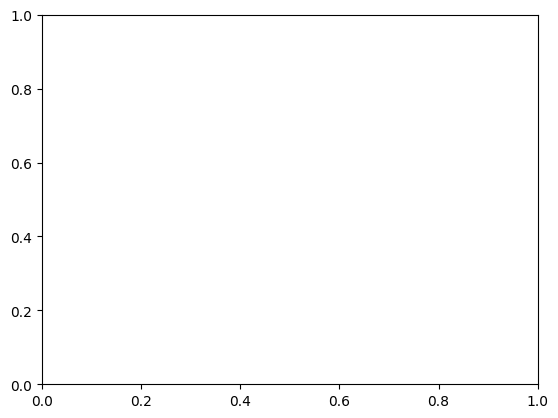

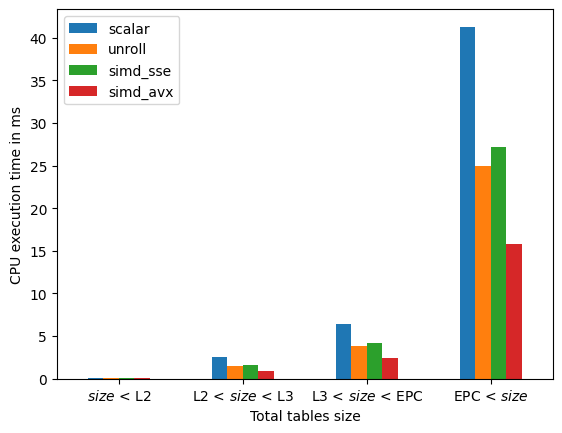

In [13]:
fig, ax = plt.subplots(1,1)

# algorithm categories/implementations
type_cat = df_native_add['type'].unique()

size_names = [
        '${size}$ < L2',
        'L2 < ${size}$ < L3',
        'L3 < ${size}$ < EPC',
        'EPC < ${size}$'
    ]

x =np.arange( 0,len(size_names) )


ax = y_native_add.plot(kind="bar")
ax.legend(type_cat)
ax.set_xticks(x, size_names, rotation = 0)
ax.set_xlabel("Total tables size",)
ax.set_ylabel("CPU execution time in ms")

Text(0, 0.5, 'CPU execution time per tuple in ms')

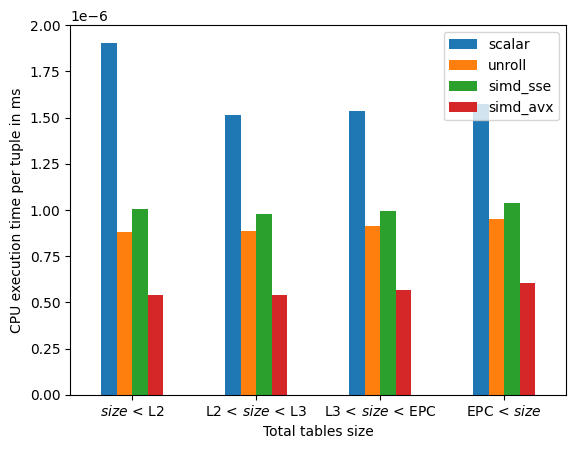

In [14]:
x =np.arange( 0,len(size_names) )


ax = y_native_add_per_tuple.plot(kind="bar")
ax.legend(type_cat)
ax.set_xticks(x, size_names, rotation = 0)
ax.set_xlabel("Total tables size",)
ax.set_ylabel("CPU execution time per tuple in ms")

In [15]:
y_native_add_throughput = y_native_add.copy()

for i in range(len(sizes)):  
    y_native_add_throughput.loc[i,:] = sizes[i] / 1000000 / y_native_add_throughput.loc[i,:] 
y_native_add_throughput

,scalar,unroll,simd_sse,simd_avx
0,0.524805,1.134805,0.996730,1.846056
1,0.660520,1.125987,1.023001,1.845678
2,0.651289,1.095119,1.003422,1.762313
3,0.634731,1.048576,0.963765,1.659139


Text(0, 0.5, 'Throughput in M rec/s')

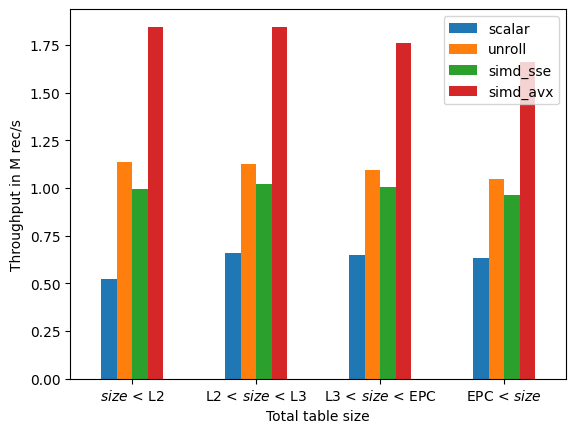

In [16]:
x =np.arange( 0,len(size_names) )


ax = y_native_add_throughput.plot(kind="bar")
ax.legend(type_cat)
ax.set_xticks(x, size_names, rotation = 0)
ax.set_xlabel("Total table size",)
ax.set_ylabel("Throughput in M rec/s")

In [17]:
y_sgx_add = {}
for t in df_sgx_add['type'].unique():
    y_sgx_add[t] = ( df_sgx_add.loc[df_sgx['type'] == t]["time"].reset_index(drop=True).to_list() )
y_sgx_add = pd.DataFrame(y_sgx_add)

In [18]:
y_sgx_add_per_tuple = y_sgx_add.copy()
mb_of_data = 262144
sizes = [int(0.2*mb_of_data),int(6.4*mb_of_data),16.0*mb_of_data,100.0*mb_of_data]
#y_native_add_cycle.loc[:,0] = y_native_add[:,0] / sizes[0]
for i in range(len(sizes)):  
    y_sgx_add_per_tuple.loc[i,:] = y_sgx_add_per_tuple.loc[i,:] / sizes[i]
y_sgx_add_per_tuple

,scalar,unroll,simd_sse,simd_avx
0,1.861601e-06,1.754788e-06,1.796750e-06,7.515068e-07
1,3.218652e-07,2.479554e-07,4.255773e-07,2.443791e-07
2,3.504753e-07,2.837181e-07,4.315376e-07,2.622604e-07
3,3.967285e-07,3.467560e-07,4.577637e-07,3.005981e-07


Text(0, 0.5, 'CPU execution time per tuple in ms')

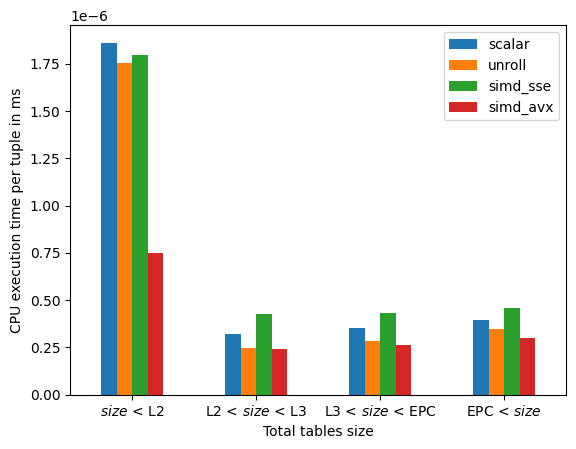

In [20]:
x =np.arange( 0,len(size_names) )


ax = y_sgx_add_per_tuple.plot(kind="bar")
ax.legend(type_cat)
ax.set_xticks(x, size_names, rotation = 0)
ax.set_xlabel("Total tables size",)
ax.set_ylabel("CPU execution time per tuple in ms")

In [19]:
y_sgx_add_throughput = y_sgx_add.copy()

for i in range(len(sizes)):  
    y_sgx_add_throughput.loc[i,:] = sizes[i] / 1000000 / y_sgx_add_throughput.loc[i,:] 
y_sgx_add_throughput

,scalar,unroll,simd_sse,simd_avx
0,0.537172,0.569870,0.556561,1.330660
1,3.106891,4.032983,2.349749,4.092002
2,2.853268,3.524625,2.317295,3.813004
3,2.520615,2.883872,2.184533,3.326701


Text(0, 0.5, 'Throughput in M rec/s')

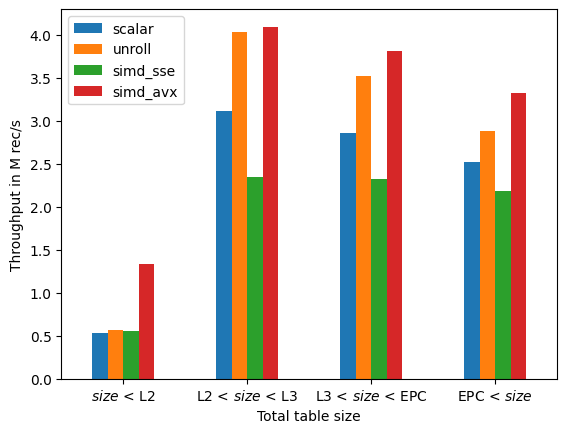

In [21]:
x =np.arange( 0,len(size_names) )


ax = y_sgx_add_throughput.plot(kind="bar")
ax.legend(type_cat)
ax.set_xticks(x, size_names, rotation = 0)
ax.set_xlabel("Total table size",)
ax.set_ylabel("Throughput in M rec/s")

Speed up.

In [ ]:
df_add = df.loc[df['operation'] == 'ADD']
df_add

,operation,type,mode,size,time
0,ADD,scalar,sgx,0.2,0.0976
1,ADD,scalar_unroll,sgx,0.2,0.0920
2,ADD,simd_sse,sgx,0.2,0.0942
4,ADD,simd_avx,sgx,0.2,0.0394
13,ADD,scalar,sgx,6.4,0.5400
14,ADD,scalar_unroll,sgx,6.4,0.4160
15,ADD,simd_sse,sgx,6.4,0.7140
17,ADD,simd_avx,sgx,6.4,0.4100
26,ADD,scalar,sgx,16.0,1.4700
27,ADD,scalar_unroll,sgx,16.0,1.1900


In [ ]:
len(df_add['size'].unique() )

4

In [ ]:
y_speedup = {}
y_speedup["scalar"] = df_add["scalar"]
#for m in range(len(df_add['size'].unique() )):
#    for t in df_add['type'].unique():
#        if t == "simd_sse" or t == "simd_avx" :
#            y_speedup[t] = round(df_add["scalar"][m]/df_add[t][m],3).append()
#        #y_speedup[t] = ( df_native_add.loc[df_native['type'] == t]["time"].reset_index(drop=True).to_list() )
#y_speedup = pd.DataFrame(y_speedup)
#y_speedup

KeyError: 'scalar'

<Axes: >

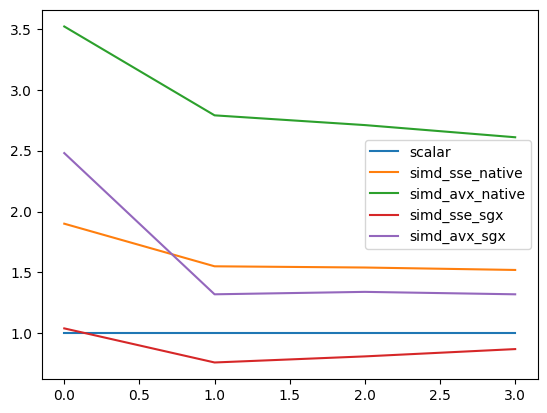

In [ ]:
y_speedup = {'scalar': [1.0, 1.0, 1.0, 1.0],'simd_sse_native': [1.9, 1.55, 1.54, 1.52], 'simd_avx_native': [3.52, 2.79, 2.71, 2.61], 'simd_sse_sgx': [1.04, 0.76, 0.81, 0.87], 'simd_avx_sgx': [2.48, 1.32, 1.34, 1.32]}
y_speedup = pd.DataFrame(y_speedup)
y_speedup
y_speedup.plot()


<Axes: >

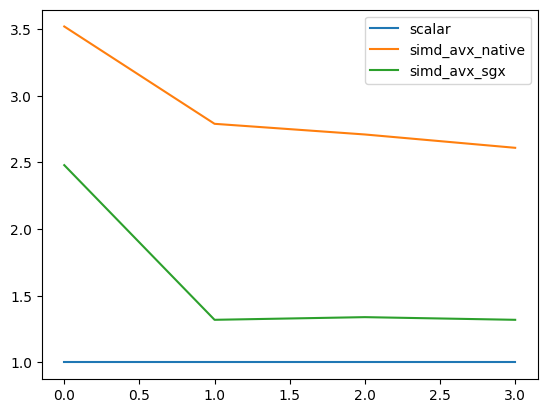

In [ ]:
y_speedup_small = {'scalar': [1.0, 1.0, 1.0, 1.0],'simd_avx_native': [3.52, 2.79, 2.71, 2.61], 'simd_avx_sgx': [2.48, 1.32, 1.34, 1.32]}
y_speedup_small = pd.DataFrame(y_speedup_small)
y_speedup_small
y_speedup_small.plot()

<Axes: >

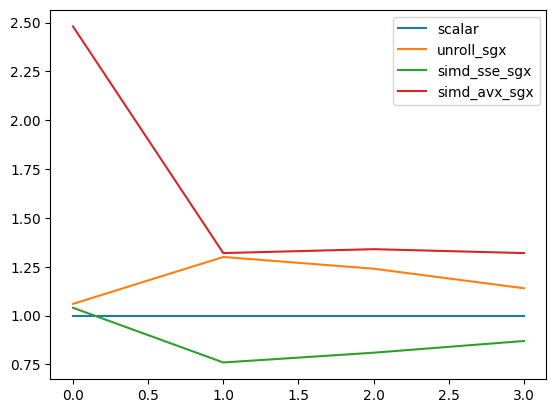

In [ ]:
y_speedup_small2 = {'scalar': [1.0, 1.0, 1.0, 1.0],'unroll_sgx': [1.06, 1.3, 1.24, 1.14], 'simd_sse_sgx': [1.04, 0.76, 0.81, 0.87], 'simd_avx_sgx': [2.48, 1.32, 1.34, 1.32]}
y_speedup_small2 = pd.DataFrame(y_speedup_small2)
y_speedup_small2
y_speedup_small2.plot()
